# 2D Data Driven World

## Member Contributions
Neville Wee: Curated and visualized data, wrote model for Task 1. <br>
Nicholas Gandhi: Researched on appropriate metric for Task 1. Task 2.<br>
Janani Sureshkumar: Task 3. <br>
Lim Thian Yew: Task 2. <br>

## Task 1: Data
Number of deaths: https://www.kaggle.com/imdevskp/corona-virus-report?select=country_wise_latest.csv<br>
GDP per capita: https://www.kaggle.com/nitishabharathi/gdp-per-capita-all-countries<br>
Gini Coefficient: https://www.kaggle.com/mannmann2/world-income-inequality-database<br>
Infant Mortality Rate: https://www.kaggle.com/komalkhetlani/infant-mortality<br>
Population Density/Urban Population/Median Age: https://www.kaggle.com/tanuprabhu/population-by-country-2020<br>

We initally thought of a few features we thought would be good predictors for our model. 

## Data Visualisation: Scatterplots
To determine whether these features would be appropriate, we plotted scatterplots of the number of deaths against the features (After removal of outliers).

## Code for plotting graphs

This code below is for demonstrating how plots are drawn using matplotlib. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib import rcParams

def impute_mean(df, feature):
    mean = df[feature].mean()
    df[feature] = df[feature].fillna(mean)
df = pd.read_csv('data_processed.csv', index_col=0)

# impute all mean
features = ['GDP_2018', 'gini', 'Infant Mortality Rate', 'Population Density', 'Urban Population', 'Median Age']
# features = ['Infant Mortality Rate', 'Population Density', 'Urban Population', 'Median Age']
# fig, axs = plt.subplots(ncols=len(features))
for i in range(len(features)):
    impute_mean(df, features[i])
    sns.scatterplot(data=df, x=features[i], y="Deaths")
    plt.savefig('plots/'+features[i]+'.png')
    plt.clf()

<Figure size 432x288 with 0 Axes>

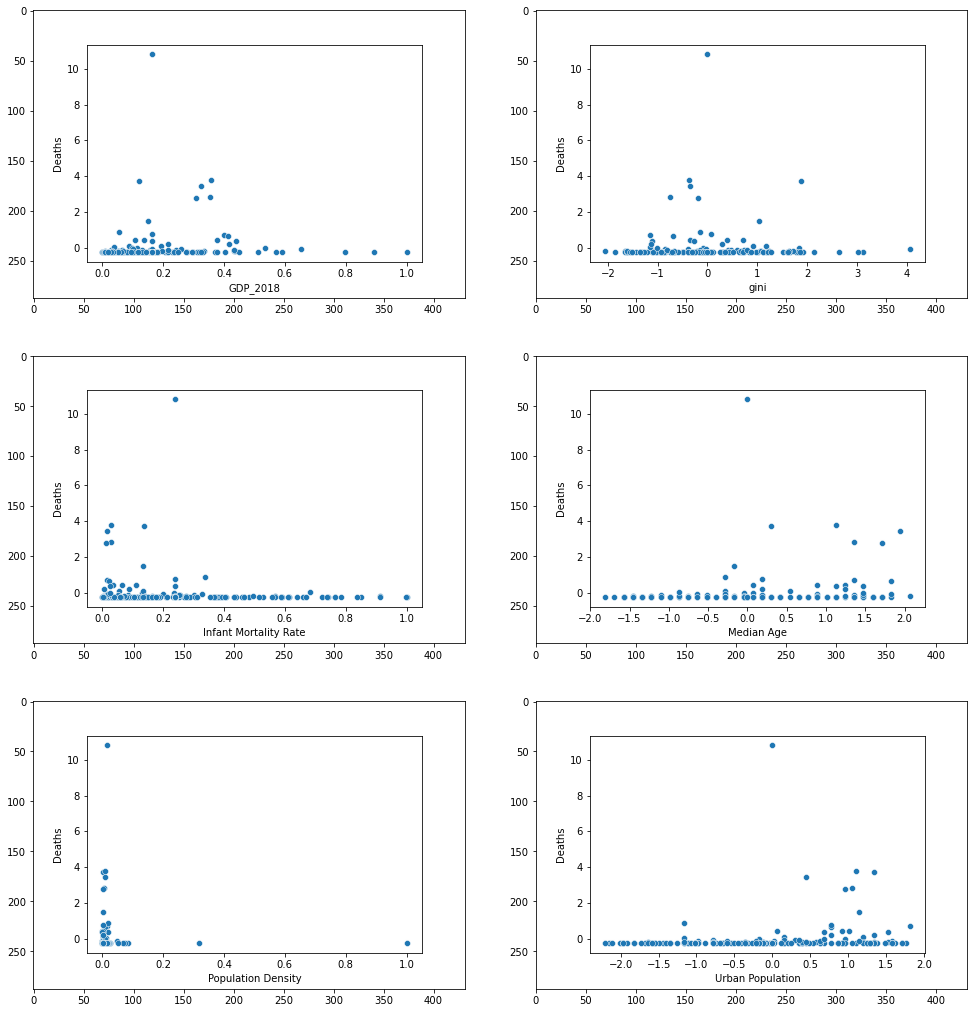

In [2]:
# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# Read images
imgs = ['GDP_2018.png', 'gini.png', 'Infant Mortality Rate.png', 'Median Age.png', 'Population Density.png', 'Urban Population.png']
plot = {}
for img in imgs:
    plot[img] = mpimg.imread('plots/'+img)
    
# Display images 
fig, ax = plt.subplots(3,2)
fig.set_figheight(18)
fig.set_figwidth(18)
fig.subplots_adjust(wspace= 0)
n = 0
for x in range(3):
    for y in range(2):
        ax[x,y].imshow(plot[imgs[n]])
        n += 1

## Data Visualisation: Boxplots
We decided to use boxplots to visualize the presence of outliers in the raw data.

In [3]:
# Visualize feature outliers via boxplot
df = pd.read_csv('data.csv', index_col=0)

# impute all mean
features = ['GDP_2018', 'gini', 'Infant Mortality Rate', 'Population Density', 'Urban Population', 'Median Age', 'Confirmed']
# fig, axs = plt.subplots(ncols=len(features))
for i in range(len(features)):
    impute_mean(df, features[i])
    sns.boxplot(data=df, x=features[i])
    plt.savefig('plots/box_'+features[i]+'.png')
    plt.clf()

<Figure size 792x576 with 0 Axes>

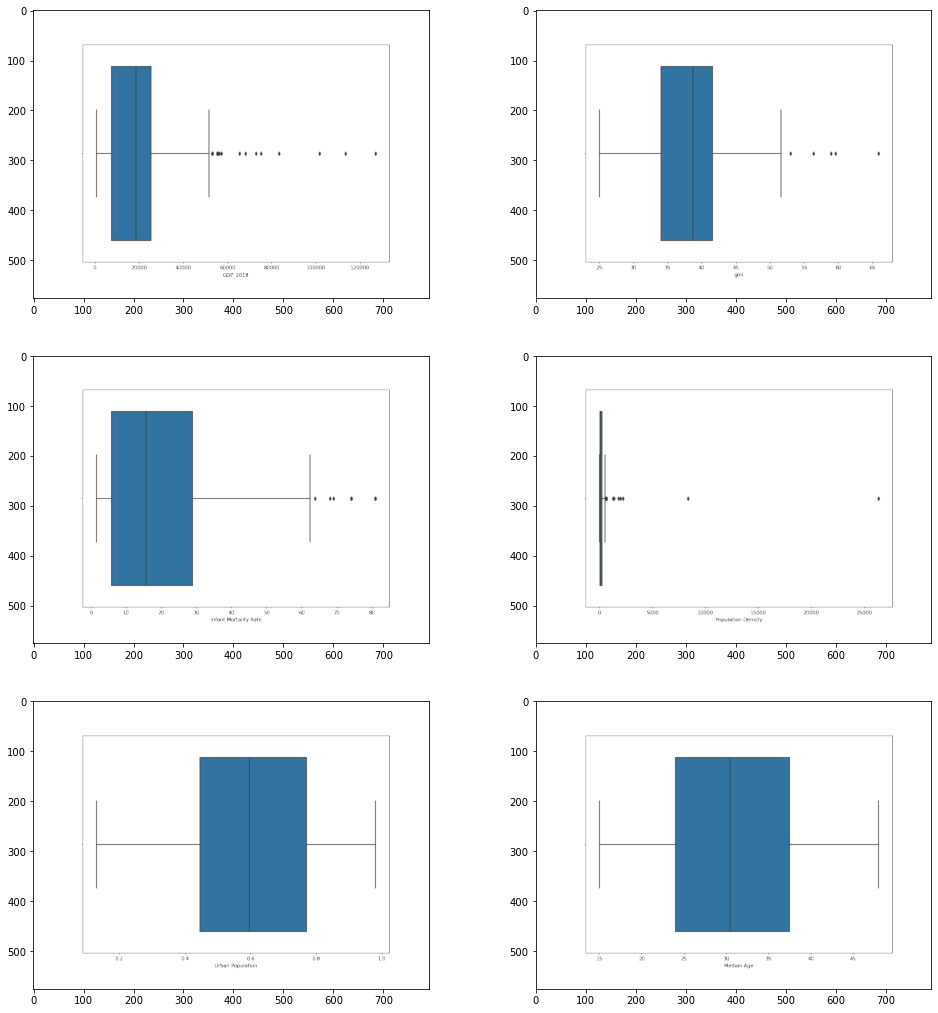

In [4]:
# figure size in inches optional
rcParams['figure.figsize'] = 11 ,8

# Read images
imgs = ['GDP_2018', 'gini', 'Infant Mortality Rate', 'Population Density', 'Urban Population', 'Median Age', 'Confirmed']
plot = {}
for img in imgs:
    plot[img] = mpimg.imread('plots/box_'+img+'.png')
    
# Display images 
fig, ax = plt.subplots(3,2)
fig.set_figheight(18)
fig.set_figwidth(18)
fig.subplots_adjust(wspace= 0)
n = 0
for x in range(3):
    for y in range(2):
        ax[x,y].imshow(plot[imgs[n]])
        n += 1

## Data Cleaning and Processing
Loading all csv files into separate dataframes.
For each individual dataframe, general cleaning such as renaming columns and indexing columns of interest is done. Furthermore, we only index the countries from these feature dataframes that are in the covid deaths dataframe.

In [5]:
import numpy as np
import pandas as pd

# Load all csv files into separate dataframes
covid = pd.read_csv('datasets/covid_deaths.csv')
gdp = pd.read_csv('datasets/gdp.csv')
gini = pd.read_csv('datasets/wiid_gini.csv', low_memory=False)
inf = pd.read_csv('datasets/infant_mortality_rate.csv', encoding="ISO-8859-1")
age = pd.read_csv('datasets/median_age.csv')
pop = pd.read_csv('datasets/population_by_country_2020.csv')

## Covid Deaths
Summing total deaths from 2020-01-22 to 2020-07-27, by country. <br>

In [6]:
# covid
# sum all covid deaths from 2020-01-22 to 2020-07-27 (by country)
print(covid.columns)
covid = covid.rename(columns={"Country/Region": "Country"})

covid = covid[['Country', 'Confirmed', 'Deaths', 'Recovered']]

covid = covid.groupby(['Country']).sum()
countries = list(covid.index)

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')


## GDP

In [7]:
# gdp
gdp = gdp[['Country ', '2018']]  # Index 2018 GDP only
gdp = gdp.rename(columns={"Country ": "Country", '2018' : 'GDP_2018'})
gdp = gdp[gdp['Country'].isin(countries)]

## Gini Coefficient
Since not all countries have recent gini coefficient readings, with some countries lacking readings from even before 2015, we set a cutoff to index all countries with values from after 2010.

In [8]:
# extract cols below from wiid_gini.csv
gini_year_cutoff = 2010
cols = ['id', 'country', 'year', ' gini ']
gini = gini[cols]
all_countries = pd.DataFrame(gini['country'].unique())
countries_gini = pd.DataFrame(gini[gini['year'] >= gini_year_cutoff]['country'].unique())
missing_countries = pd.concat([all_countries, countries_gini]).drop_duplicates(keep=False)
gini = gini[gini['year'] >= gini_year_cutoff]
gini = gini.groupby(['country']).mean()
gini = gini[gini.index.isin(countries)]
gini = pd.DataFrame(gini[' gini '])
gini = gini.rename(columns={' gini ' : 'gini'})

## Infant Mortality

In [9]:
# infant mortality
inf = inf[(inf['Year'] == 2019) & (inf['Gender']=='Total')]
inf = inf[inf['Country'].isin(countries)]
inf = inf[['Country', 'Infant Mortality Rate']]

## Population

In [10]:
# population
pop = pop[['Country (or dependency)', 'Density (P/Km²)', 'Urban Pop %', 'Med. Age']]
pop = pop.rename(columns={"Country (or dependency)": "Country", 'Density (P/Km²)':'Population Density',
                            'Urban Pop %':'Urban Population', 'Med. Age':'Median Age'})
pop = pop[pop['Country'].isin(countries)]
pop = pop.sort_values(by=['Country'])

In [11]:
# Combine all dataframes into single dataframe
df = covid.merge(gdp, how='left', left_on='Country', right_on='Country')
df = df.merge(gini, how='left', left_on='Country', right_index=True)
df = df.merge(inf, how='left', left_on='Country', right_on='Country')
df = df.merge(pop, how='left', left_on='Country', right_on='Country')

## Urban Population/Median Age
We replace the "N.A." string values with np.Nan, and convert the string values in Urban Population to a float type (From "25%" to 0.25).

In [12]:
# Fix Urban Population Column
# Replace N.A. with NaN
df['Urban Population'] = df['Urban Population'].replace('N.A.', np.NaN)
df['Median Age'] = df['Median Age'].replace('N.A.', np.NaN)
# Convert 25 % to 0.25
df.loc[df['Urban Population'].notna(), 'Urban Population'] = df[df['Urban Population'].notna()]['Urban Population'].apply(lambda x: int(x[:-2])/100)
df.to_csv('data.csv')
# Convert Median column value types to float from str
df['Median Age'] = pd.to_numeric(df['Median Age'])
print(df)

                Country  Confirmed  Deaths  Recovered      GDP_2018  \
0           Afghanistan    1936390   49098     798240   1955.006208   
1               Albania     196702    5708     118877  13364.155400   
2               Algeria    1179755   77972     755897  15481.787620   
3               Andorra      94404    5423      69074           NaN   
4                Angola      22662    1078       6573   6452.355165   
..                  ...        ...     ...        ...           ...   
182  West Bank and Gaza     233461    1370      61124   5157.568578   
183      Western Sahara        901      63        648           NaN   
184               Yemen      67180   17707      23779           NaN   
185              Zambia     129421    2643      83611   4223.906936   
186            Zimbabwe      50794     881      12207   3029.793005   

          gini  Infant Mortality Rate  Population Density Urban Population  \
0    32.000000              46.512825                60.0            

## Imputation

In order to deal with missing values, we implemented a few statistical methods of filling in the data, including filling in all NaN values with mean, median, mode or a constant. As of now, we will arbitrarily pick impute_mean as our method, and cross-validate the other methods later on to see which one gives us the best result for our model.

In [13]:
def impute_mean(df, feature):
    mean = df[feature].mean()
    df[feature] = df[feature].fillna(mean)

def impute_mode(df, feature):
    mode = df[feature].mode()
    df[feature] = df[feature].fillna(mode[0])

def impute_median(df, feature):
    median = df[feature].median()
    df[feature] = df[feature].fillna(median)

def impute_constant(df, feature, const=0):
    df[feature] = df[feature].fillna(const)

## Data Scaling
As we have learnt in our cohorts, there is a need to normalize our features such that our model is not biased towards certain features over others. We have decided to implement normalization for data that does not follow a Gaussian distribution and standardization for data that does.

In [14]:
def normalize(df, feature):
    min = df[feature].min()
    max = df[feature].max()
    df[feature] = df[feature].apply(lambda x: (x-min)/(max-min))

def standardize(df, feature):
    mean = df[feature].mean()
    std = df[feature].std()
    df[feature] = df[feature].apply(lambda x: (x-mean)/std)

## Final Pipeline
We will now apply our imputation and normalization methods to the data we have combined into a single DataFrame earlier.

In [15]:
# Imputation (Impute mean first, cross validate other methods later)
features = ['GDP_2018', 'gini', 'Infant Mortality Rate', 'Population Density', 'Urban Population', 'Median Age']
for feature in features:
    impute_mean(df, feature)
# Scale Features ()
normally_distributed = ['gini', 'Urban Population', 'Median Age']
not_normally_distributed = ['GDP_2018', 'Infant Mortality Rate', 'Population Density']
for feature in normally_distributed:
    standardize(df, feature)
for feature in not_normally_distributed:
    normalize(df, feature)

# Scale Labels (standardize)
standardize(df, 'Deaths')

# Save new DataFrame to a csv
df.to_csv('data_processed.csv', index=False)

In [16]:
print(df)

                Country  Confirmed    Deaths  Recovered  GDP_2018  \
0           Afghanistan    1936390 -0.183324     798240  0.009598   
1               Albania     196702 -0.226813     118877  0.100036   
2               Algeria    1179755 -0.154384     755897  0.116822   
3               Andorra      94404 -0.227099      69074  0.164993   
4                Angola      22662 -0.231454       6573  0.045248   
..                  ...        ...       ...        ...       ...   
182  West Bank and Gaza     233461 -0.231161      61124  0.034984   
183      Western Sahara        901 -0.232471        648  0.164993   
184               Yemen      67180 -0.214787      23779  0.164993   
185              Zambia     129421 -0.229885      83611  0.027583   
186            Zimbabwe      50794 -0.231651      12207  0.018118   

             gini  Infant Mortality Rate  Population Density  \
0   -1.009881e+00               0.566213            0.002278   
1   -9.097726e-01               0.089562   

## Task 1: Model
## Discussion on features
While scatterplots are useful in visualizing a possible relationship between features and the number of deaths, a good metric would be more appropriate in choosing which features to include or remove in the model. We decided to utilise Pearson's Correlation Coefficient in order to determine the level of linear correlation between our features and label.



## Pearson Correlation Coefficient Formula

$$r = \frac{\Sigma(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\Sigma(x_i-\bar{x})^2(y_i-\bar{y})^2}}$$


## Pearson Correlation Coefficient Implementation

In [17]:
def pearsons_r(df, feature, label):
    x = df[feature].to_numpy()
    y = df[label].to_numpy()
    num = ((x - x.mean())*(y - y.mean())).sum()
    x1 = ((x - x.mean())**2).sum()
    y1 = ((y - y.mean())**2).sum()
    den = (x1*y1)**0.5
    return num/den

Iterating through the features to calculate the respective r values.

In [18]:
df = pd.read_csv('data_processed.csv')
features = ['GDP_2018', 'gini', 'Infant Mortality Rate', 'Population Density', 'Urban Population', 'Median Age']

for feature in features:
    print(feature, ':', pearsons_r(df, feature, 'Deaths'))

GDP_2018 : 0.10178419029463641
gini : 0.009142921481868172
Infant Mortality Rate : -0.11109483412568627
Population Density : -0.01824510044210233
Urban Population : 0.14046752685915423
Median Age : 0.15956387714810863


Since the r values for our features aren't looking too great, we can look to a change of features in order to improve our model's accuracy later on.

## Discussion on building model

Our model closely follows what we have done in class, implementing multiple linear regression with gradient descent.

In [19]:
def normalize_z(df):
    mean = df.mean(axis=0)
    std = df.std(axis=0)
    return (df - mean) / std

def get_features_targets(df, feature_names, target_names):
    df_feature = df[feature_names]
    df_target = df[target_names]
    return df_feature, df_target

def compute_cost(X, y, beta):
    m = len(y)
    # print('X:', X)
    # print('beta', beta)
    J = (1/(2*m))*(np.square(np.matmul(X, beta) - y)).sum(axis=0)
    return J

def prepare_feature(df_feature):
    m, n = df_feature.shape
    feature_np = df_feature.to_numpy()
    feature_np = feature_np.reshape(m,n)
    feature_np = np.concatenate((np.ones((m,1)), feature_np), axis=1)
    return feature_np

def prepare_target(df_target):
    target_np = df_target.to_numpy()
    return target_np

def gradient_descent(X, y, beta, alpha, num_iters):
    m = len(y)
    J_storage = []
    for iter in range(num_iters):
        J_storage.append(compute_cost(X, y, beta))
        hx = np.matmul(X, beta)
        beta = beta - alpha*(1/m)*(np.matmul(X.T, hx - y))
    return beta, J_storage

def predict_norm(X, beta):
    return np.matmul(X, beta)


def predict(df_feature, beta):
    df_feature = normalize_z(df_feature)
    df_feature = prepare_feature(df_feature)
    return predict_norm(df_feature, beta)

def mean_squared_error(target, pred):
    n = len(target)
    mse = (1/n)*(np.square(target-pred)).sum(axis=0)
    return mse

## K-folds Cross Validation

In order to better evaluate the effectiveness of our model, we decided to implement k-folds cross validation, which gives a less biased estimate of our model's skill as opposed to a regular train test split.

In [20]:
import statistics

def cross_val_score(df_feature, df_target, beta, alpha, num_iters, random_state=100, cv=5):
    index = df_feature.index
    index = list(index)

    # Shuffles the indexes
    np.random.RandomState(random_state).shuffle(index)

    # Split indexes into cv parts
    folds = partition(index, cv)
    mse_scores = []
    betas = []

    # Iterates through cv parts, each time using each part as test set/rest as train set
    # records mse value and adds to scores
    for fold in folds:
        # basically train test split here
        df_feature_train = df_feature[~df_feature.index.isin(fold)]
        df_target_train = df_target[~df_target.index.isin(fold)]
        
        df_feature_test = df_feature.loc[fold]
        df_target_test = df_target.loc[fold]

        X = df_feature_train
        X = prepare_feature(X)
        y = prepare_target(df_target_train)

        beta_temp, J_storage = gradient_descent(X, y, beta, alpha, num_iters)
        pred = predict(df_feature_test, beta_temp)
        target = prepare_target(df_target_test)
        mse = mean_squared_error(target, pred).item(0)

        mse_scores.append(mse)
        betas.append(beta_temp)
        
    return statistics.mean(mse_scores), betas


# Splits list into n equal parts
def partition(lst, n):
    division = len(lst) / n
    return [lst[round(division * i):round(division * (i + 1))] for i in range(n)]

## Task 1: Model Evaluation

With regards to the appropriate metric, we deliberated between $r^2$, MSE (Mean Squared Error) and RMSE (Root Mean Squared Error).<br>

$$r^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$


Although $r^2$ is a good measure for how well a model fits dependent variables, this metric does not take into account the overfitting problem. This is because if the regression model contains too many independent variables, the model becomes too complicated. Hence while the model may fit the training data very well, it will perform poorly on the testing data. <br>

$$MSE = \frac{1}{n}\Sigma_{i=1}^n(y^i - \hat{y}^i)^2$$

Therefore, we believe that Mean Squared Error (MSE) is a better metric since MSE is derived by summing the square of the prediction error (real output minus the predicted output) and then dividing it by the number of data points. This yields an absolute number that represents how much the predicted results differ from the actual value. <br>

$$RMSE = \sqrt{MSE}$$

Root Mean Square Error (RMSE) is the square root of MSE. RMSE may be preferred because sometimes the MSE value may be too large, and thus, can be difficult to compare. Outliers have a significant impact on the RMSE and hence should be removed from the data. 
One more thing to note is that RMSE is based on the premise that errors are unbiased and have a normal distribution.<br>

## Results of metric on test data set

In [21]:
features = ['GDP_2018', 'gini', 'Infant Mortality Rate', 'Population Density', 'Urban Population', 'Median Age']
no_features = len(features)

df_features, df_target = get_features_targets(df, features, ['Deaths'])

mse, betas = cross_val_score(df_features, df_target, beta=np.zeros((no_features+1, 1)),
                              alpha=0.1, num_iters=10000, random_state=100, cv=10)
print(mse)

1.2284225206207715


## Discussion of result

Since all features and labels have been normalized/standardized, intuitively, a mse of 1.2284 is quite significant. We theorize this is due to the low pearson's coefficient values for a good number of our features. As seen in our boxplot, there are also a significant number of right skewed outliers in many of our features.

## Task 1: Improvements (Iterations)

As we mentioned earlier, there are steps we can take in attempting to improve the accuracy of our model. These include a removal of outliers, removing and adding features, and changing our imputation method.

## Removal of Outliers
Typically, outliers are defined as being 3 standard deviations from the mean. However, with smaller datasets such as ours, lower values such as 2 can be used as well. We can cross-validate a few options to see which gives us the best result with our model.

In [22]:
def remove_outliers_std(df, feature, number=3):
    std = df[feature].std()
    mean = df[feature].mean()
    return df.loc[(df[feature] > mean-number*std) & (df[feature] < mean+number*std)]

In [23]:
stds = [1, 1.5, 2, 2.5, 3]

for std in stds:
    df_outlier_removed = df
    for feature in features:
        df_outlier_removed = remove_outliers_std(df, feature, std)
        
    df_features, df_target = get_features_targets(df_outlier_removed, features, ['Deaths'])
    print('STD:', std)
    # print('No. of entries: ', len(df_features))
    mse, betas = cross_val_score(df_features, df_target, beta=np.zeros((no_features+1, 1)),
                              alpha=0.1, num_iters=10000, random_state=100, cv=10)
    print('MSE:', mse)

STD: 1
MSE: 1.6357496721387859
STD: 1.5
MSE: 1.1691924826313973
STD: 2
MSE: 1.1959873500337659
STD: 2.5
MSE: 1.2284225206207715
STD: 3
MSE: 1.2284225206207715


Hence we can see that a value around 1.5 would be best for our model.

## Removing Features
Based on the r values we have retrieved from earlier, we choose to remove a few features with r values closest to zero. We have decided to keep only the Median Age and Urban Population features from earlier. We also decided to add new features: Total number of confirmed cases, ...

In [24]:
for feature in features:
    df = remove_outliers_std(df, feature, 1.5)

In [25]:
old_features = ['GDP_2018', 'gini', 'Infant Mortality Rate', 'Population Density', 'Urban Population', 'Median Age']
new_features = ['Urban Population', 'Median Age']
old_n = len(old_features)
new_n = len(new_features)

df_features, df_target = get_features_targets(df, old_features, ['Deaths'])
mse, betas = cross_val_score(df_features, df_target, beta=np.zeros((old_n+1, 1)),
                              alpha=0.1, num_iters=10000, random_state=100, cv=10)
print('Old Features MSE:', mse)

df_features, df_target = get_features_targets(df, new_features, ['Deaths'])
mse, betas = cross_val_score(df_features, df_target, beta=np.zeros((new_n+1, 1)),
                              alpha=0.1, num_iters=10000, random_state=100, cv=10)
print('New Features MSE:', mse)

Old Features MSE: 8.921087289734162
New Features MSE: 1.6828226386502436


## Adding Features

We check the r score of the features first to determine their suitability.

In [26]:
df = pd.read_csv('data_processed.csv')
features = ['Urban Population', 'Median Age', 'Confirmed']

for feature in features:
    print('feature', ':', pearsons_r(df, feature, 'Deaths'))

feature : 0.14046752685915423
feature : 0.15956387714810863
feature : 0.9256469644699575


In [27]:
df = pd.read_csv('data.csv')

# Imputation (Impute mean first, cross validate other methods later)
features = ['Urban Population', 'Median Age', 'Confirmed']
for feature in features:
    impute_mean(df, feature)

# Scale Features
normally_distributed = ['Urban Population', 'Median Age']
not_normally_distributed = ['Confirmed']
for feature in normally_distributed:
    standardize(df, feature)
for feature in not_normally_distributed:
    normalize(df, feature)

# Scale Labels (Standardize)
standardize(df, 'Deaths')

In [28]:
old_features = ['Urban Population', 'Median Age']
new_features = ['Urban Population', 'Median Age', 'Confirmed']
old_n = len(old_features)
new_n = len(new_features)


df_features, df_target = get_features_targets(df, old_features, ['Deaths'])
mse, betas = cross_val_score(df_features, df_target, beta=np.zeros((old_n+1, 1)),
                              alpha=0.1, num_iters=10000, random_state=100, cv=10)
print('Old Features MSE:', mse)

df_features, df_target = get_features_targets(df, new_features, ['Deaths'])
mse, betas = cross_val_score(df_features, df_target, beta=np.zeros((new_n+1, 1)),
                              alpha=0.1, num_iters=10000, random_state=100, cv=10)
print('New Features MSE:', mse)

Old Features MSE: 0.985559150812561
New Features MSE: 101.26817678758069


Hence, while intuitively the addition of a feature with a higher r value would give a better MSE result, the opposite happens in practice, and we stick to the original features we have.

## Imputation Methods

Below, we iterate through the imputation methods and create our models accordingly, displaying the MSE result for each method.

In [29]:
# Iterate through imputation methods
df = pd.read_csv('data.csv')
functions = [impute_mean, impute_median, impute_mode, impute_constant]
features = ['Urban Population', 'Median Age']
for function in functions:
    df = pd.read_csv('data.csv')
    for feature in features:
        function(df, feature)
        # Scale features
        standardize(df, feature)
    # Scale Labels (Standardize)
    standardize(df, 'Deaths')
    df_features, df_target = get_features_targets(df, features, ['Deaths'])
    mse, betas = cross_val_score(df_features, df_target, beta=np.zeros((old_n+1, 1)),
                              alpha=0.1, num_iters=10000, random_state=100, cv=10)
    print(str(function) + ':', mse)

<function impute_mean at 0x00000204E9849E50>: 0.985559150812561
<function impute_median at 0x00000204E9849EE0>: 0.9857541566555835
<function impute_mode at 0x00000204D45BE0D0>: 0.9894283459837636
<function impute_constant at 0x00000204E9849F70>: 1.0506684559858344


Hence its seems like impute mean is the best imputation method for our model.

## Putting it all together

In [30]:
df = pd.read_csv('data.csv')
  
# impute, remove outlier, scale

# Imputation (Impute mean first, cross validate other methods later)
features = ['Urban Population', 'Median Age']
no_features = len(features)
for feature in features:
    impute_mean(df, feature)
    df = remove_outliers_std(df, feature, 1.5)

# Scale Features
normally_distributed = ['Urban Population', 'Median Age']
for feature in normally_distributed:
    standardize(df, feature)

# Scale Labels (Standardize)
standardize(df, 'Deaths')

df_features, df_target = get_features_targets(df, features, ['Deaths'])
    
mse, betas = cross_val_score(df_features, df_target, beta=np.zeros((no_features+1, 1)),
                          alpha=0.1, num_iters=10000, random_state=100, cv=10)
print('MSE:', mse)

# Display beta values
ls = [0,0,0]
for beta in betas:
    for x in range(3):
        ls[x] += beta[x]
for x in range(3):
    ls[x]/len(betas)
print('beta values:', ls)

MSE: 0.9745361068204257
beta values: [array([0.00060841]), array([0.91836434]), array([0.62884582])]


We have managed to improve our MSE by a decent amount, from 1.22842 to 0.97454.

# Task 2

__Discover__ : During 'Data Exploration and Visualisation', there might be a correlation between positive test rate and other factors affecting it.<br>
__Define__ : Make a model to find a correlation between positive test rate and factors that are affecting it.<br><br>

Data : https://ourworldindata.org/covid-deaths <br><br>


## Data

Display the data, category of each column and the countries.

In [31]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv('datasets/owid-covid-data.csv')
df = df[df['continent'].notna()] # filter out the rows for location that is not a specific country (e.g. South East Asia)
display(df) # display the data

# get unique iso codes for each country in the dataset 
countries = df['iso_code'].to_numpy()
countries = np.unique(countries)

print(df.columns)
print(countries)
print(f'{len(countries)} countries')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134661,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134662,ZWE,Africa,Zimbabwe,2021-11-17,133557.0,52.0,36.429,4699.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134663,ZWE,Africa,Zimbabwe,2021-11-18,133593.0,36.0,37.714,4699.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
134664,ZWE,Africa,Zimbabwe,2021-11-19,133593.0,0.0,37.714,4699.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

Ensure that there is no gap in the data. (i.e. there are no days missing in the data)

In [33]:
sort_df = df.sort_values(by=['date'], ascending=True)
dates = pd.to_datetime(sort_df['date'])
date_diffs = dates.diff().to_numpy()[1:]
second_diffs = date_diffs / np.timedelta64(1, 's')
day_diffs = second_diffs / (24 * 3600)

print(day_diffs)
assert max(day_diffs) < 2
print('unique day offsets', np.unique(day_diffs))

[0. 0. 1. ... 0. 0. 0.]
unique day offsets [0. 1.]


## Data Exploration and Visualization 

Use Line plot to better visualise the number of days of data recorded for each country after they are sorted.

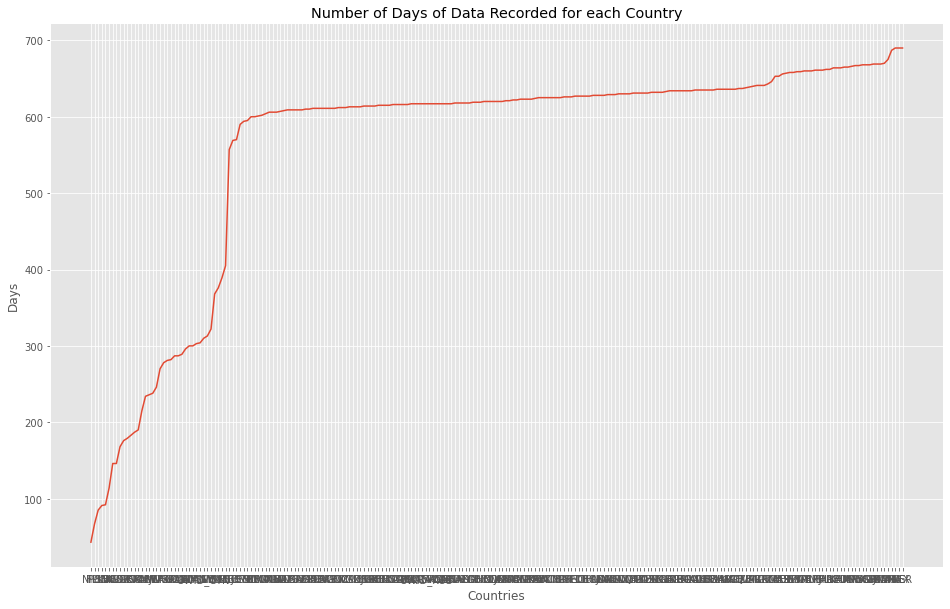

In [34]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
durations = []

# to get the number of days recorded for each country
for iso_code in countries:
    iso_df = df[df['iso_code'] == iso_code]
    duration = len(iso_df)
    durations.append(duration)

plt.title('Number of Days of Data Recorded for each Country')
plt.ylabel('Days')
plt.xlabel('Countries')

# sort countries and days recorded for each country by days recorded
# makes the graph look nicer
durations = np.array(durations)
indexes = np.argsort(durations)
countries = countries[indexes]
durations = durations[indexes]
plt.plot(countries, durations)

Use Scatter plot to better visualise the relationship between weekly hospital admission and number of smoothed new cases.

<AxesSubplot:title={'center':'Weekly hospital admission vs Number of smoothed new cases'}, xlabel='Number of smoothed new cases', ylabel='Weekly hospital admission'>

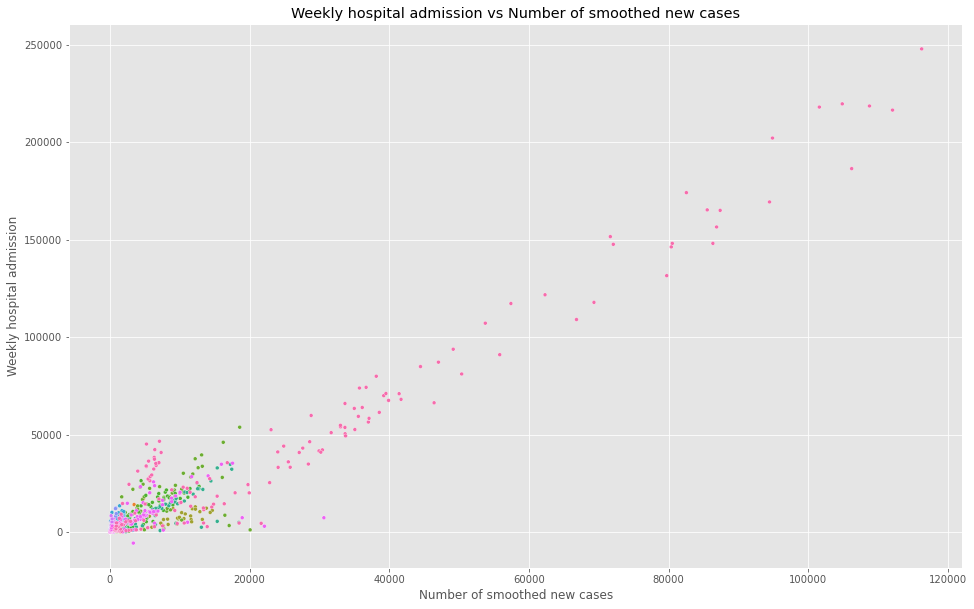

In [35]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
plt.title('Weekly hospital admission vs Number of smoothed new cases')
plt.ylabel('Weekly hospital admission')
plt.xlabel('Number of smoothed new cases')
sns.scatterplot(
    x='weekly_hosp_admissions', y='new_cases_smoothed', hue='iso_code', 
    data=df, s=15, legend=False
)

Use Scatter plot to better visualise the relationship between weekly ICU admission and weekly hospital admission

<AxesSubplot:title={'center':'Weekly hospital admission vs Weekly ICU admission'}, xlabel='Weekly ICU admission', ylabel='Weekly hospital admission'>

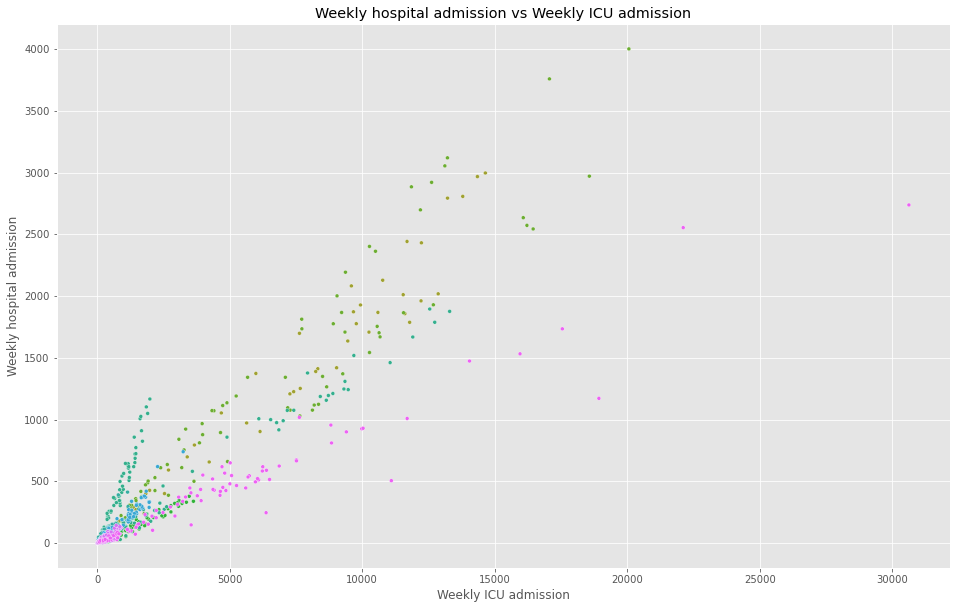

In [36]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
plt.title('Weekly hospital admission vs Weekly ICU admission')
plt.ylabel('Weekly hospital admission')
plt.xlabel('Weekly ICU admission')

sns.scatterplot(
    x='weekly_hosp_admissions', y='weekly_icu_admissions', hue='iso_code', 
    data=df, s=15, legend=False
)

Use Scatter plot to better visualise the relationship between weekly ICU admission and smoothed number of cases in Singapore.

<AxesSubplot:title={'center':'Weekly ICU admission vs Number of smoothed new cases'}, xlabel='Number of smoothed new cases', ylabel='Weekly ICU admission'>

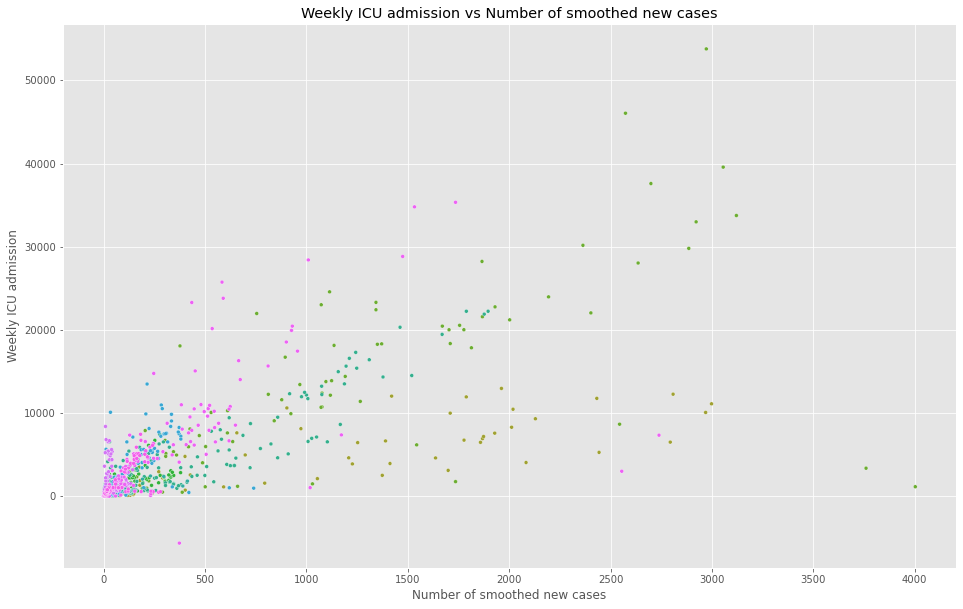

In [37]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
plt.title('Weekly ICU admission vs Number of smoothed new cases')
plt.ylabel('Weekly ICU admission')
plt.xlabel('Number of smoothed new cases')

sns.scatterplot(
    x='weekly_icu_admissions', y='new_cases_smoothed', hue='iso_code', 
    data=df, s=15, legend=False
)

Use Scatter plot to better visualise the relationship between positive test rate and total vaccinations per hundred (each country is represented by a different hue) (2 shots count as 2 vaccinations). We can conclude that the higher vaccination rate leads to a lower positive test rate, which is reasonable.

Text(0.5, 0, 'Number of smoothed new cases')

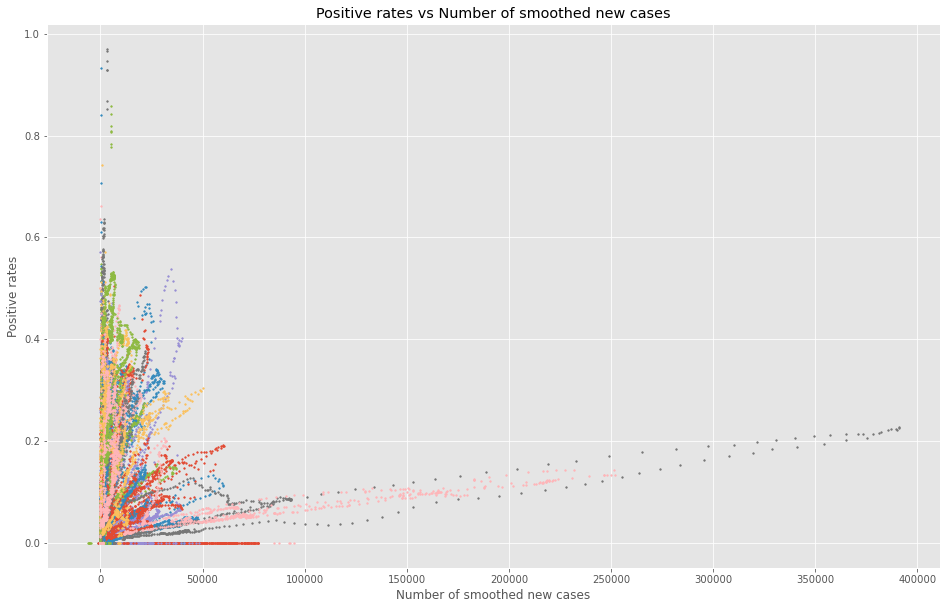

In [38]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))

for iso_code in countries:
    iso_df = df[df['iso_code'] == iso_code]
    icu_admissions = iso_df['positive_rate'].fillna(0)
    cases = iso_df['new_cases_smoothed'].fillna(0)

    plt.scatter(cases, icu_admissions, s=3)

plt.title('Positive rates vs Number of smoothed new cases')
plt.ylabel('Positive rates')
plt.xlabel('Number of smoothed new cases')

Use Scatter plot to better visualise the relationship between positive rate and smoothed number of new cases.(each country is represented by a different hue)

<AxesSubplot:title={'center':'Positive rates vs Total vaccinations per hundred'}, xlabel='Total vaccinations per hundred', ylabel='Positive rates'>

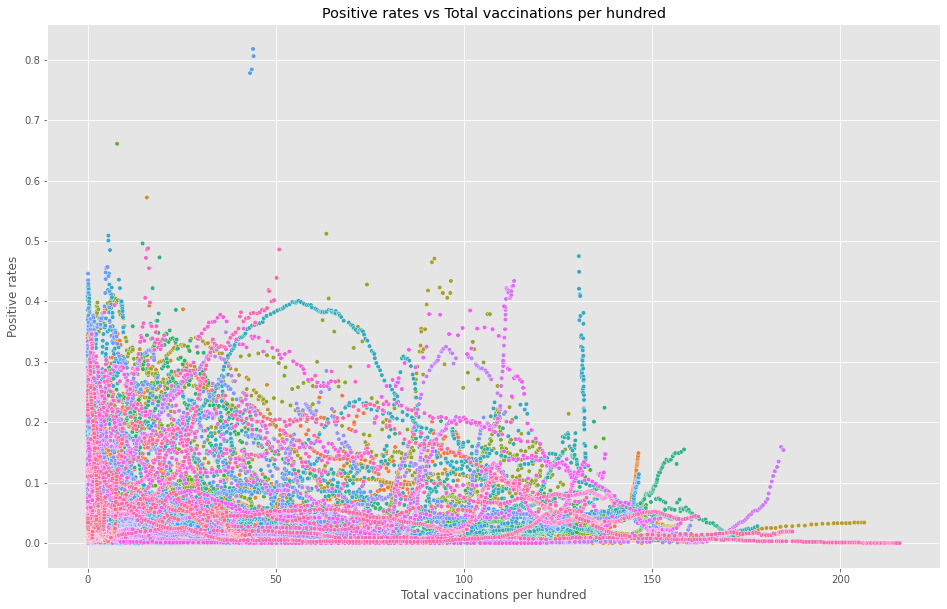

In [39]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
plt.title('Positive rates vs Total vaccinations per hundred')
plt.ylabel('Positive rates')
plt.xlabel('Total vaccinations per hundred')
sns.scatterplot(
    x='total_vaccinations_per_hundred', y='positive_rate',
    data=df, legend=False, s=20, hue='iso_code'
)

Use Scatter plot to better visualise the relationship between positive test rate and gdp per capita (each country is represented by a different hue). We can conclude that the higher gdp per capita leads to a lower positive test rate, which is reasonable.

<AxesSubplot:title={'center':'Positive rates vs GDP per capita'}, xlabel='GDP per capita', ylabel='Positive rates'>

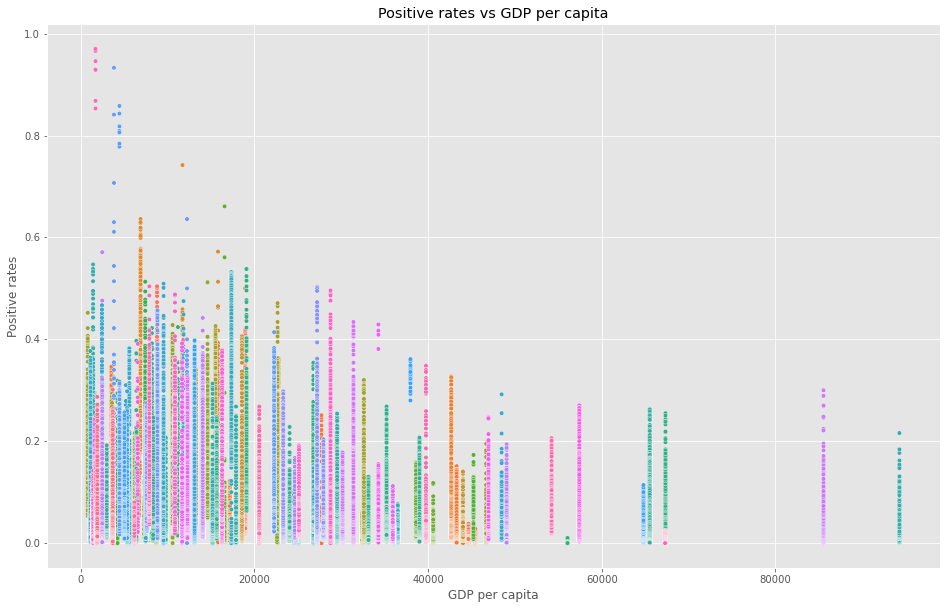

In [40]:
plt.style.use('ggplot')
plt.figure(figsize=(16,10))
plt.title('Positive rates vs GDP per capita')
plt.ylabel('Positive rates')
plt.xlabel('GDP per capita')
sns.scatterplot(
    x='gdp_per_capita', y='positive_rate',
    data=df, legend=False, s=20, hue='iso_code'
)

Use histogram to better visualise the number of positive rates

(array([4.3196e+04, 1.2072e+04, 5.4950e+03, 2.2760e+03, 6.4800e+02,
        1.8300e+02, 1.7000e+01, 2.0000e+00, 1.0000e+01, 6.0000e+00]),
 array([0.   , 0.097, 0.194, 0.291, 0.388, 0.485, 0.582, 0.679, 0.776,
        0.873, 0.97 ]),
 <BarContainer object of 10 artists>)

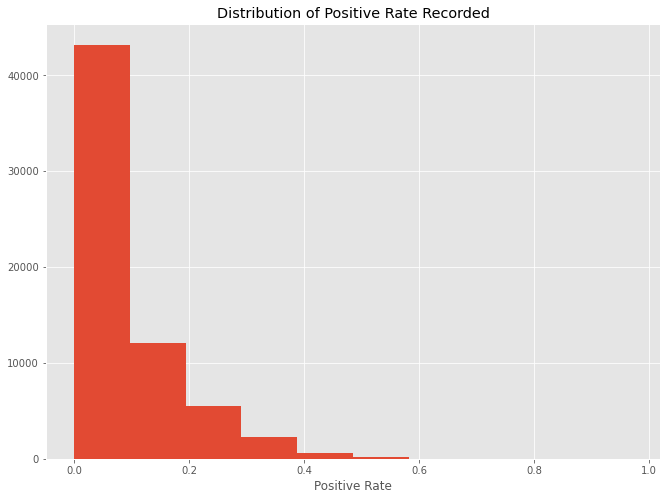

In [41]:
plt.style.use('ggplot')

icu = df['positive_rate']
plt.xlabel('Positive Rate' )
plt.title('Distribution of Positive Rate Recorded')
plt.hist(icu)

Use histogram to visualise the number of new smoothed cases

(array([5.8116e+04, 9.3820e+03, 5.2090e+03, 3.8820e+03, 3.3030e+03,
        3.1120e+03, 2.4740e+03, 2.0420e+03, 1.8420e+03, 1.6250e+03,
        1.3990e+03, 1.2390e+03, 1.1670e+03, 1.0770e+03, 9.5000e+02,
        8.3600e+02, 7.0900e+02, 7.1200e+02, 6.2000e+02, 5.5800e+02,
        5.7300e+02, 5.5300e+02, 4.4100e+02, 4.1900e+02, 4.1500e+02,
        3.5400e+02, 3.1100e+02, 3.1500e+02, 2.8000e+02, 2.7400e+02,
        2.5800e+02, 2.5000e+02, 2.3600e+02, 2.2800e+02, 2.2900e+02,
        2.4600e+02, 2.1000e+02, 1.7800e+02, 1.8800e+02, 1.9500e+02,
        1.5800e+02, 2.0300e+02, 1.6600e+02, 1.6600e+02, 1.4300e+02,
        1.5400e+02, 1.2500e+02, 1.5300e+02, 1.4000e+02, 1.4000e+02,
        1.5400e+02, 1.3100e+02, 1.4600e+02, 1.4700e+02, 1.5200e+02,
        1.4100e+02, 1.2000e+02, 1.0400e+02, 1.2700e+02, 9.9000e+01,
        1.1000e+02, 1.3600e+02, 1.1600e+02, 9.4000e+01, 1.0900e+02,
        1.1700e+02, 1.1700e+02, 9.6000e+01, 1.0400e+02, 1.0500e+02,
        6.7000e+01, 8.5000e+01, 9.1000e+01, 7.70

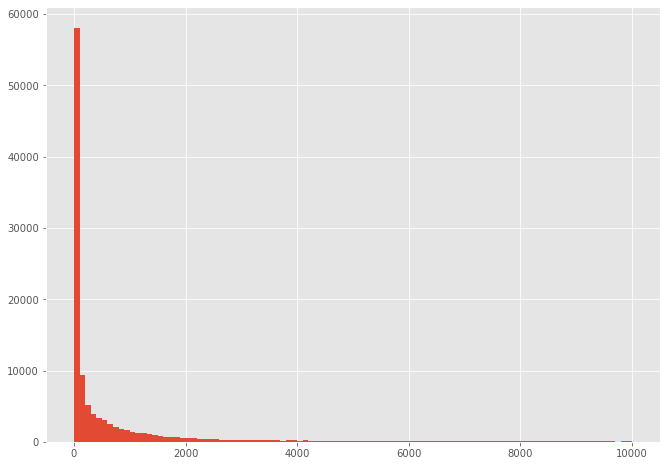

In [42]:
plt.hist(df['new_cases_smoothed'], bins=100, range=[0, 10000])

## Data Visualisation : Conclusion

Based on the data visualised above, we have observed that there is a relationship between several features and the positive test rates. Therefore, we want to build a model to try and predict the positive test rates using the features in the dataset.

## Data Cleaning and Processing

Clean the data by replacing NaN positive test rate values with 0.

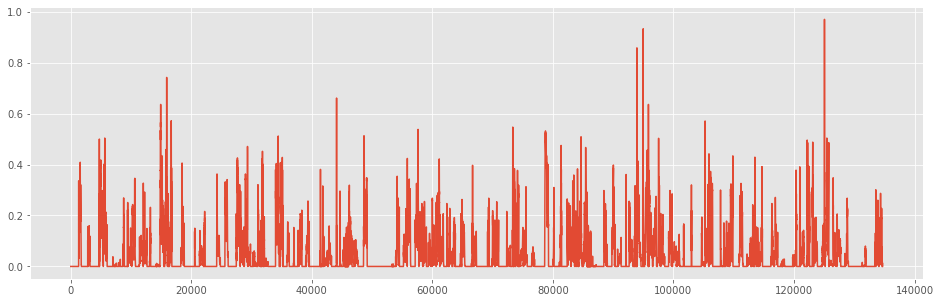

In [43]:
df['positive_rate_cleaned'] = df['positive_rate'].fillna(0)
# make sure all rows have positive rate > 0
assert len(df[df['positive_rate'] < 0]) == 0

positive_rate = df['positive_rate_cleaned']

plt.figure(figsize=(16,5))

plt.plot(positive_rate)

0.0 0.97


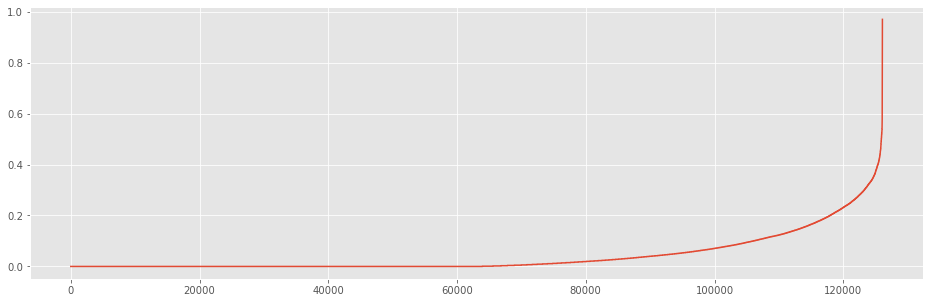

In [44]:
plt.figure(figsize=(16,5))

# plot the distribution of positive test rates
print(min(positive_rate), max(positive_rate))
plt.plot(sorted(positive_rate))

(array([1.648e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.240e+03,
        0.000e+00, 9.770e+02, 0.000e+00, 0.000e+00, 1.106e+03, 1.066e+03,
        0.000e+00, 8.590e+02, 8.190e+02, 1.624e+03, 7.520e+02, 8.120e+02,
        1.358e+03, 1.421e+03, 1.201e+03, 1.851e+03, 1.829e+03, 2.119e+03,
        1.891e+03, 1.698e+03, 2.517e+03, 2.311e+03, 2.083e+03, 2.427e+03,
        2.617e+03, 2.293e+03, 2.351e+03, 2.444e+03, 2.753e+03, 2.420e+03,
        2.312e+03, 2.154e+03, 1.926e+03, 2.035e+03, 1.685e+03, 1.379e+03,
        1.078e+03, 6.150e+02, 2.570e+02, 1.610e+02, 3.000e+01, 2.000e+00,
        8.000e+00, 9.000e+00]),
 array([-6.90775528, -6.77020936, -6.63266344, -6.49511751, -6.35757159,
        -6.22002567, -6.08247975, -5.94493383, -5.80738791, -5.66984199,
        -5.53229606, -5.39475014, -5.25720422, -5.1196583 , -4.98211238,
        -4.84456646, -4.70702054, -4.56947461, -4.43192869, -4.29438277,
        -4.15683685, -4.01929093, -3.88174501, -3.74419909, -3.60665316,
        -3.

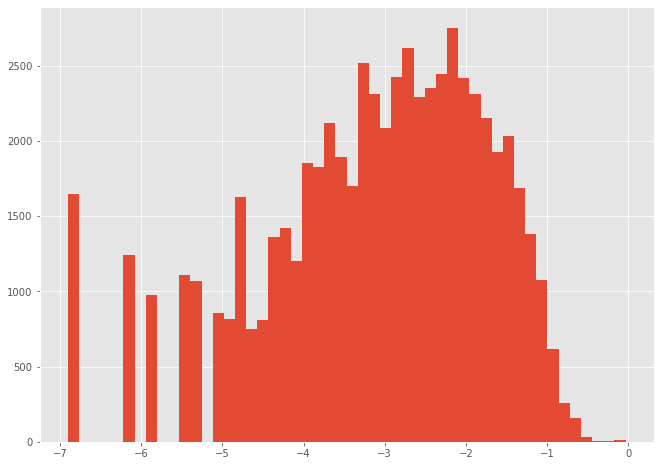

In [45]:
log_positive_rate = np.log(positive_rate + 1e-20)
df['log_positive_rate'] = log_positive_rate
log_positive_rate = log_positive_rate[log_positive_rate > -7]
plt.hist(log_positive_rate, bins=50)

The figure above shows that the log positive test rate roughly follows a normal distribution curve. As a result, this makes it more suitable for linear regression because the values we are predicting are no longer ranged-bound from 0 to 1. Stretching the data using its log also makes the model more sensitive to logarithmic changes in the positive test rates. (A 0.1% positive test rate vs 0.01% positive test rate is very close numerically; but in reality, the consequence of these different test rates on covid policy can be quite significant. So, it is important that our model can distinguish between the two.) <br><br>
We also remove the rows where the log positive rate is less than -7 which is around 1 in 1000 because those values are too noisy. We also get rid of rows where the positive test rates is zero because the corresponding log positive test rate would be negative for those rows.

dropped 1098 nan rows for feature median_age
dropped 1008 nan rows for feature gdp_per_capita
dropped 0 nan rows for feature aged_65_older
dropped 618 nan rows for feature aged_70_older
dropped 0 nan rows for feature life_expectancy
dropped 0 nan rows for feature human_development_index
dropped 262 nan rows for feature population_density
trainable rows = 59152


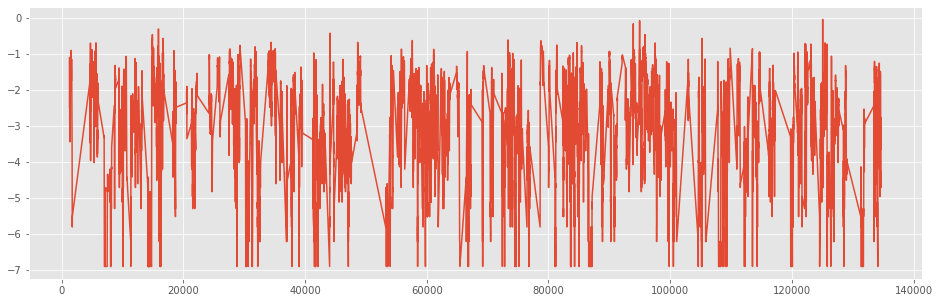

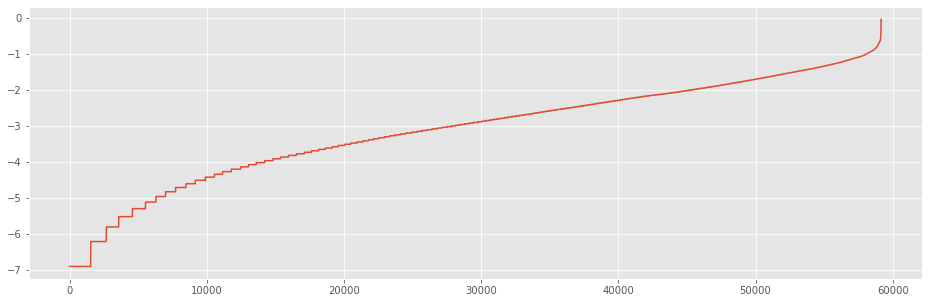

In [46]:
trainable_df = df[
    df['log_positive_rate'] >= -7
]

features = [
    'median_age', 'gdp_per_capita', 'aged_65_older', 'aged_70_older', 'life_expectancy', 
    'human_development_index', 'population_density'
]

# Remove rows where any of the features is NaN
# for vaccinated and fully vaccinated per hundred, we replace nan values with 0 instead later 
for feature in features:
    col = trainable_df[feature]
    nan_rows = col.isnull().sum()
    trainable_df = trainable_df[trainable_df[feature].notna()]
    print(f'dropped {nan_rows} nan rows for feature {feature}')

print(f'trainable rows = {len(trainable_df)}')

plt.figure(figsize=(16,5))
plt.plot(trainable_df['log_positive_rate'])
plt.figure(figsize=(16,5))
plt.plot(sorted(trainable_df['log_positive_rate']))

In [47]:
display(trainable_df)
print(trainable_df.columns)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,positive_rate_cleaned,log_positive_rate
1301,ALB,Europe,Albania,2020-03-14,38.0,5.0,5.429,1.0,0.0,0.143,...,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN,0.085,-2.465104
1302,ALB,Europe,Albania,2020-03-15,42.0,4.0,6.000,1.0,0.0,0.143,...,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN,0.088,-2.430418
1303,ALB,Europe,Albania,2020-03-16,51.0,9.0,7.000,1.0,0.0,0.143,...,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN,0.101,-2.292635
1304,ALB,Europe,Albania,2020-03-17,55.0,4.0,6.429,1.0,0.0,0.143,...,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN,0.092,-2.385967
1305,ALB,Europe,Albania,2020-03-18,59.0,4.0,6.714,2.0,1.0,0.143,...,NaN,2.89,78.57,0.795,NaN,NaN,NaN,NaN,0.092,-2.385967
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134659,ZWE,Africa,Zimbabwe,2021-11-14,133428.0,35.0,34.429,4696.0,0.0,1.571,...,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN,0.013,-4.342806
134660,ZWE,Africa,Zimbabwe,2021-11-15,133438.0,10.0,33.286,4697.0,1.0,1.000,...,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN,0.013,-4.342806
134661,ZWE,Africa,Zimbabwe,2021-11-16,133505.0,67.0,37.571,4698.0,1.0,1.000,...,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN,0.014,-4.268698
134662,ZWE,Africa,Zimbabwe,2021-11-17,133557.0,52.0,36.429,4699.0,1.0,0.714,...,36.791,1.70,61.49,0.571,NaN,NaN,NaN,NaN,0.014,-4.268698


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

## Discussion on Building Model

The model closely follows what we have done in class, implementing linear regression with gradient descent.

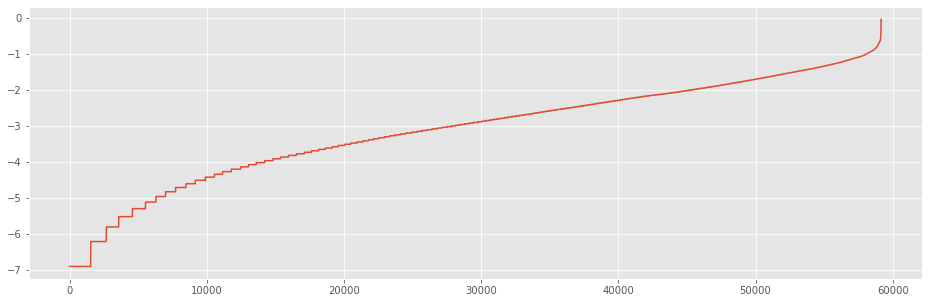

In [48]:
plt.figure(figsize=(16,5))
plt.plot(sorted(trainable_df['log_positive_rate']))

Plot each potential features versus their log ratios of positive test rates to gain better understanding whether there is a relationship between the two. From the figures below, we can conclude that 'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred', 'median_age', 'gdp_per_capita', 'aged_65_older', 'aged_70_older', 'life_expectancy', 
'human_development_index', 'population_density' do affect the log ratios.

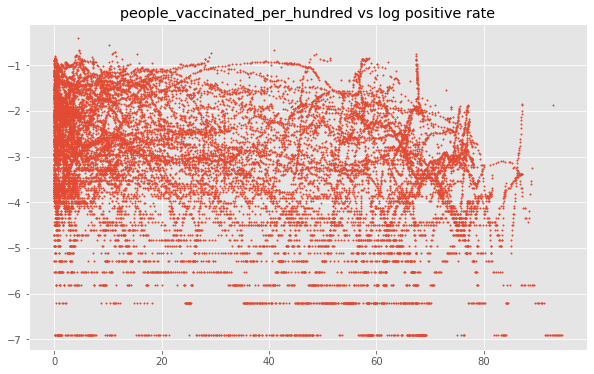

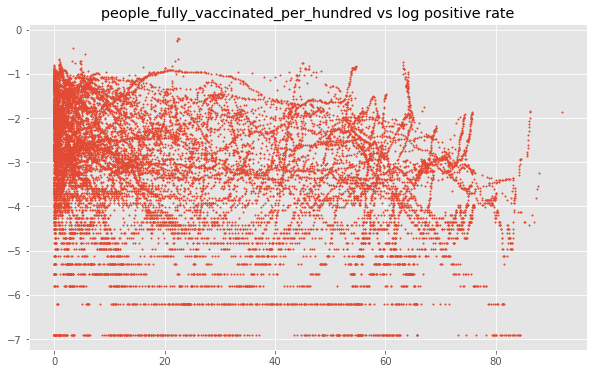

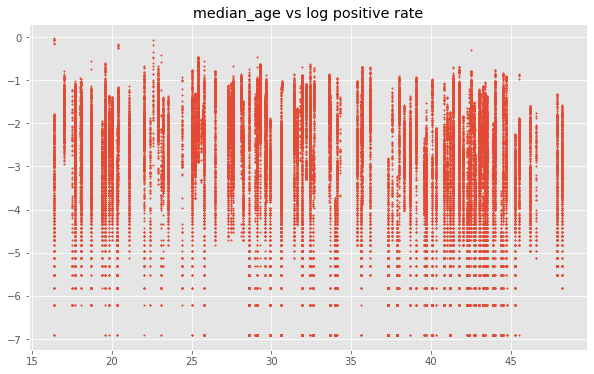

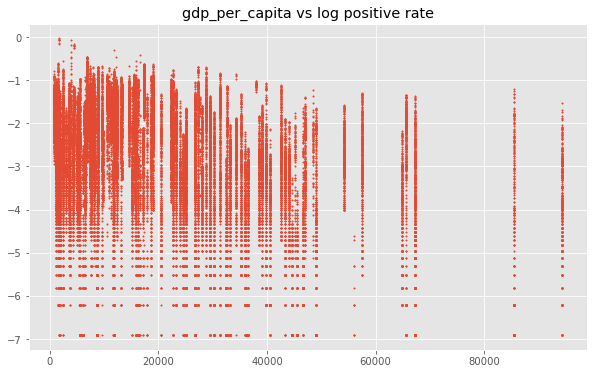

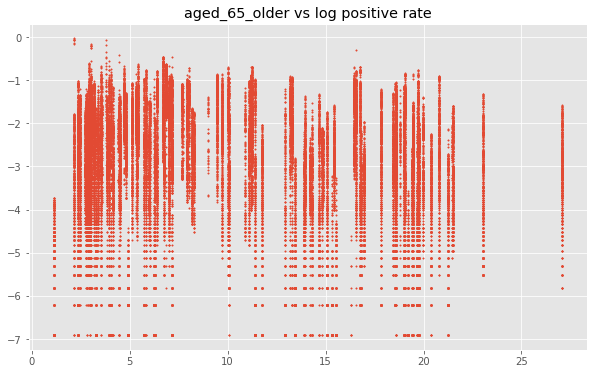

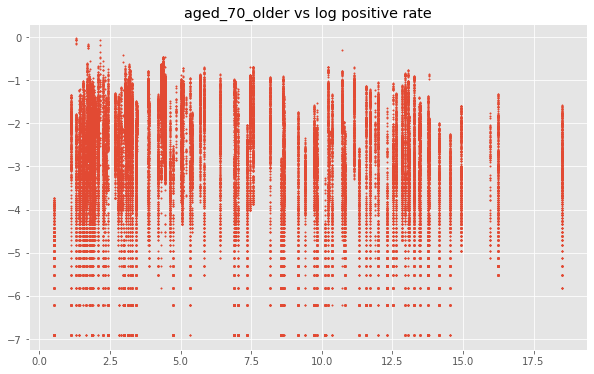

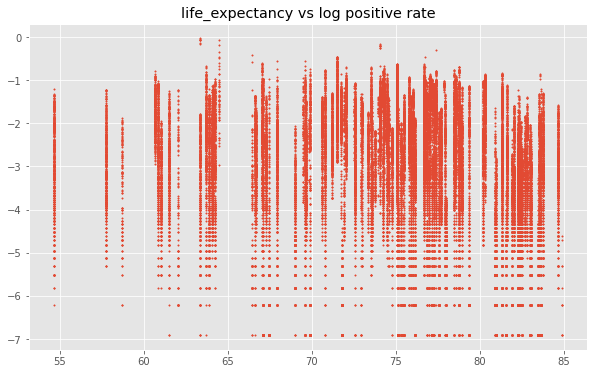

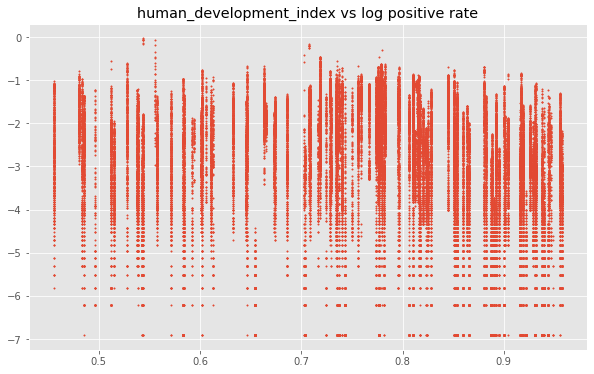

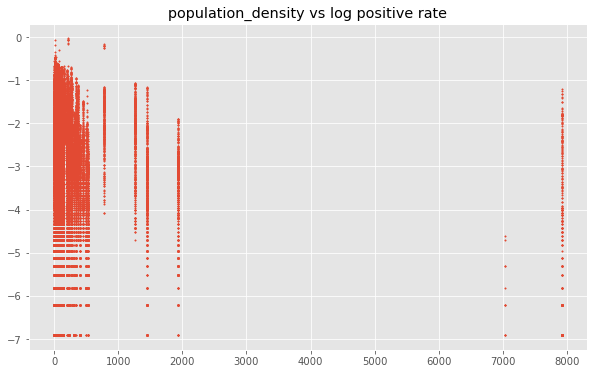

In [49]:
target_columns = [
    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'median_age', 'gdp_per_capita', 'aged_65_older', 'aged_70_older', 'life_expectancy', 
    'human_development_index', 'population_density'
]

for column in target_columns:
    sort_df = trainable_df.sort_values(column)
    gdp  = sort_df[column]
    log_positive_rate = sort_df['log_positive_rate']
    
    plt.figure(figsize=(10,6))
    plt.title(f'{column} vs log positive rate')
    plt.scatter(gdp, log_positive_rate, s=2)

The code below is from what we have learned in Cohort Problem Set.

In [50]:
def compute_cost(X, y, beta):
    J = 0
    
    m=X.shape[0]
    
    yp=np.matmul(X,beta)
    
    error=yp-y
    
    J=(1/(2*m)) *np.matmul(error.T,error)
    J = J[0][0]
    return J

    
def gradient_descent(X, y, beta, alpha, num_iters):
    m=y.shape[0]
    J_storage=np.zeros(num_iters)
    for n in range(num_iters):
        #calculate yp,predicted value using the old beta
        
        yp=np.matmul(X,beta)
        #calculate the error yp-y
        error=yp-y
        #calculate the delta for beta
        delta=np.matmul(X.T,error)
        #caluclate the new beta
        beta=beta-(alpha/m)*delta
        #calculate J for the new beta
        J_storage[n]=compute_cost(X,y,beta)
    return beta, J_storage

def get_features_targets(df, feature_names, target_names):
    df_feature = df.loc[:,feature_names]
    df_target = df.loc[:,target_names]
    return df_feature, df_target

def prepare_feature(df_feature):
    cols = len(df_feature.columns)
    #convert df to numpy array for feature matrix
    feature = df_feature.to_numpy().reshape(-1,cols)
    #to get the no of rows
    m=df_feature.shape[0]
    # to create a vector of ones, m rows
    array1=np.ones((m,1))
    #add the column one with the feature matrix
    x=np.concatenate((array1,feature),axis=1)
    
    return x

def prepare_target(df_target):
    cols = len(df_target.columns)
    #convert df to numpy array for target vector
    target = df_target.to_numpy().reshape(-1,cols)
    return target

def predict(df_feature, beta):
    norm_feature = normalize_z(df_feature)
    X=prepare_feature(norm_feature)
    return predict_norm(X,beta)

def predict_norm(X, beta):
    return np.matmul(X,beta)

def split_data(df_feature, df_target, random_state=None, test_size=0.5):
    indices = df_feature.index
    if random_state !=None:
        np.random.seed(random_state)
    num_rows=len(indices)
    k=int(test_size*num_rows)
    test_indices=np.random.choice(indices,k,replace=False)
    
    indices=set(indices)
    test_indices=set(test_indices)
    train_indices=indices-test_indices
    
    df_feature_train=df_feature.loc[train_indices,:]
    df_feature_test=df_feature.loc[test_indices,:]
    df_target_train=df_target.loc[train_indices,:]
    df_target_test=df_target.loc[test_indices,:]
    return df_feature_train, df_feature_test, df_target_train, df_target_test
  

def mean_squared_error(target, pred):
    n=target.shape[0]
    return (1/n)*np.sum((target-pred)**2)

def normalize_z(dfin):
    dfout = (dfin-dfin.mean(axis=0))/dfin.std(axis=0)
    return dfout

In [51]:
features = trainable_df[[
    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'median_age', 'gdp_per_capita', 'aged_65_older', 'aged_70_older', 'life_expectancy', 
    'human_development_index', 'population_density'
]].fillna(0)

n= 9

df_target = trainable_df[['log_positive_rate']]

# do train test split
df_feature_train, df_feature_test, df_target_train, df_target_test = split_data(features,df_target,test_size=0.3)

# normalize features
df_feature_train_z=normalize_z(df_feature_train)
X=prepare_feature(df_feature_train_z)
y=prepare_target(df_target_train)

# gradient descent
beta,J_storage = gradient_descent(X,y,beta=np.zeros((n+1,1)),alpha=0.01,num_iters=10000)

train_pred=predict(df_feature_train,beta)
y_train = df_target_train

test_pred = predict(df_feature_test, beta)
y_test = df_target_test

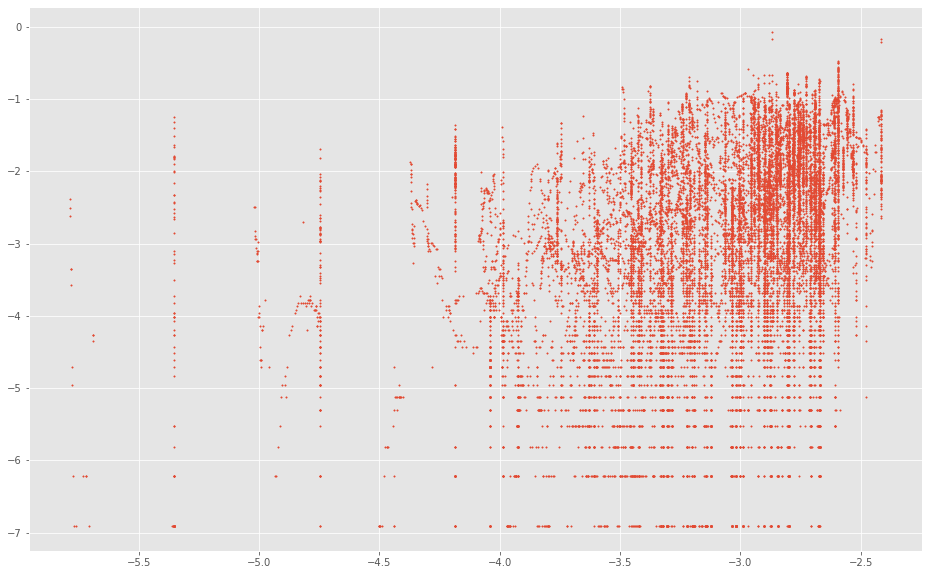

In [52]:
plt.figure(figsize=(16,10))
plt.scatter(test_pred, y_test, s=2)

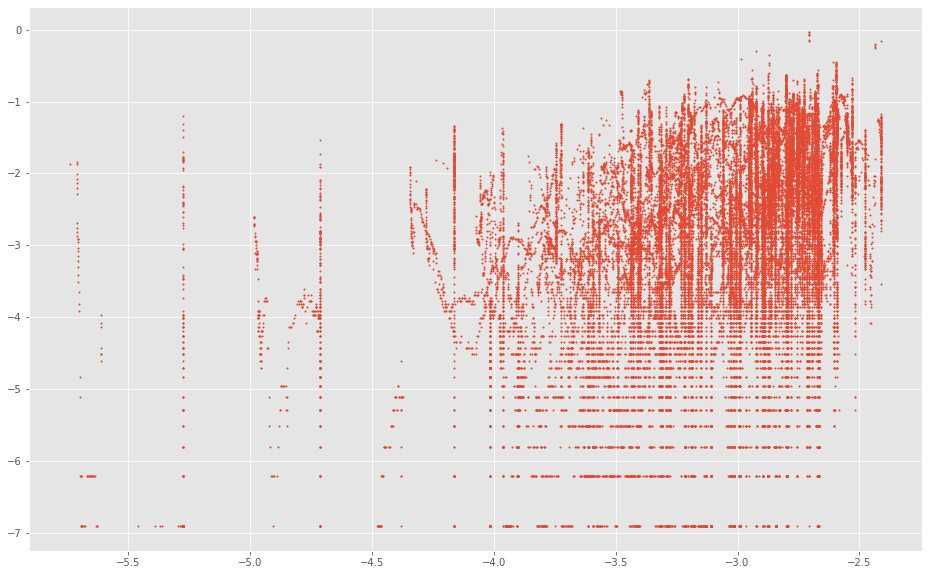

In [53]:
plt.figure(figsize=(16,10))
plt.scatter(train_pred, y_train,s=2)

## Metric Evaluation

We consider using Mean Squared Error (MSE) as the best metric to evaluate the model. MSE is derived by summing the square of the prediction error (real output minus the predicted output) and then dividing it by the number of data points. This yields an absolute number that represents how much the predicted results differ from the actual value. Similar to Task 1, we feel R square metric is not a good choice of metric since there are many independent variables involved. <br> <br>
We chose mean square error over mean error because mean square error is able to penalise extremely wrong values whereas mean error does not due to the square term.

In [54]:
mse = mean_squared_error(train_pred,y_train)
print(mse)

log_positive_rate    1.757351
dtype: float64


## Model Improvement

We feel that it is necessary to clean out the rows where the number of cases is below 1000 since the positive test rate of such rows is very noisy.

dropped 23 nan rows for feature median_age
dropped 84 nan rows for feature gdp_per_capita
dropped 0 nan rows for feature aged_65_older
dropped 290 nan rows for feature aged_70_older
dropped 0 nan rows for feature life_expectancy
dropped 0 nan rows for feature human_development_index
dropped 0 nan rows for feature population_density
trainable rows = 22476


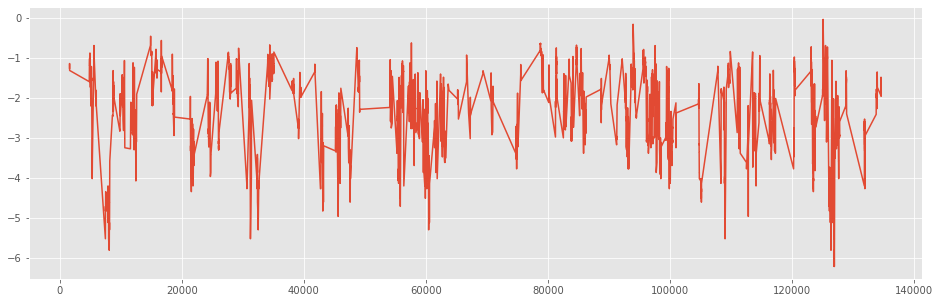

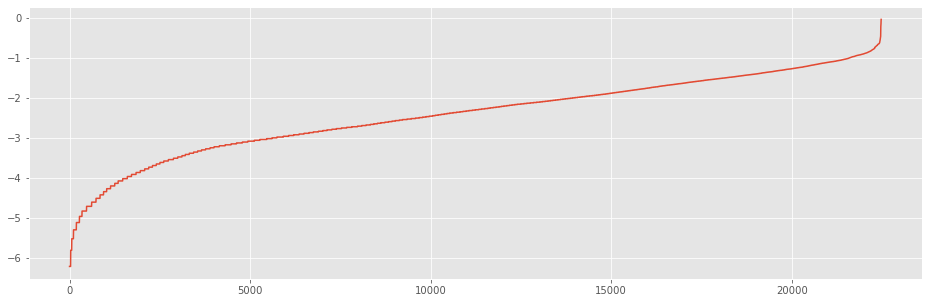

In [55]:
df['new_cases_cleaned'] = df['new_cases_smoothed'].fillna(0)

trainable_df_new = df[
    (df['new_cases_cleaned'] > 1000) &
    (df['log_positive_rate'] >= -7)
]

features_new = [
    'median_age', 'gdp_per_capita', 'aged_65_older', 'aged_70_older', 'life_expectancy', 
    'human_development_index', 'population_density'
]


# Remove rows where any of the features is NaN
# for vaccinated and fully vaccinated per hundred, we replace nan values with 0 instead later 
for feature in features_new:
    col = trainable_df_new[feature]
    nan_rows = col.isnull().sum()
    trainable_df_new = trainable_df_new[trainable_df_new[feature].notna()]
    print(f'dropped {nan_rows} nan rows for feature {feature}')

print(f'trainable rows = {len(trainable_df_new)}')

plt.figure(figsize=(16,5))
plt.plot(trainable_df_new['log_positive_rate'])
plt.figure(figsize=(16,5))
plt.plot(sorted(trainable_df_new['log_positive_rate']))

(array([  30.,    0.,    0.,   30.,    0.,   48.,    0.,   80.,   85.,
           0.,   71.,  126.,  141.,  233.,   97.,  194.,  210.,  254.,
         242.,  350.,  311.,  494.,  438.,  456.,  895.,  821., 1025.,
         898., 1091.,  959.,  948., 1058., 1079., 1204., 1069.,  990.,
        1001., 1029., 1092.,  941.,  765.,  749.,  479.,  281.,  135.,
          50.,   13.,    0.,    7.,    7.]),
 array([-6.2146081 , -6.09092512, -5.96724214, -5.84355916, -5.71987619,
        -5.59619321, -5.47251023, -5.34882725, -5.22514428, -5.1014613 ,
        -4.97777832, -4.85409534, -4.73041236, -4.60672939, -4.48304641,
        -4.35936343, -4.23568045, -4.11199748, -3.9883145 , -3.86463152,
        -3.74094854, -3.61726556, -3.49358259, -3.36989961, -3.24621663,
        -3.12253365, -2.99885068, -2.8751677 , -2.75148472, -2.62780174,
        -2.50411876, -2.38043579, -2.25675281, -2.13306983, -2.00938685,
        -1.88570387, -1.7620209 , -1.63833792, -1.51465494, -1.39097196,
        -1.26728

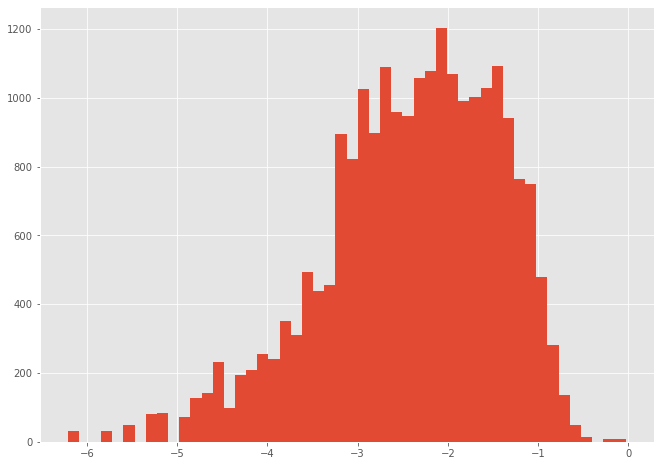

In [56]:
log_positive_rate_new = trainable_df_new['log_positive_rate']
log_positive_rate_new = log_positive_rate_new[log_positive_rate > -7]
plt.hist(log_positive_rate_new, bins=50)

In [57]:
features_new = trainable_df_new[[
    'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
    'median_age', 'gdp_per_capita', 'aged_65_older', 'aged_70_older', 'life_expectancy', 
    'human_development_index', 'population_density'
]].fillna(0)

n= 9

df_target_new = trainable_df_new[['log_positive_rate']]

# do train test split
df_feature_train_new, df_feature_test_new, df_target_train_new, df_target_test_new = split_data(features_new,df_target_new,test_size=0.3)

# normalise features
df_feature_train_z_new=normalize_z(df_feature_train_new)
X_new=prepare_feature(df_feature_train_z_new)
y_new=prepare_target(df_target_train_new)

# gradient descent
beta_new,J_storage_new = gradient_descent(X_new,y_new,beta=np.zeros((n+1,1)),alpha=0.01,num_iters=10000)
train_pred_new=predict(df_feature_train_new,beta_new)
y_train_new = df_target_train_new

test_pred_new = predict(df_feature_test_new, beta_new)
y_test_new = df_target_test_new

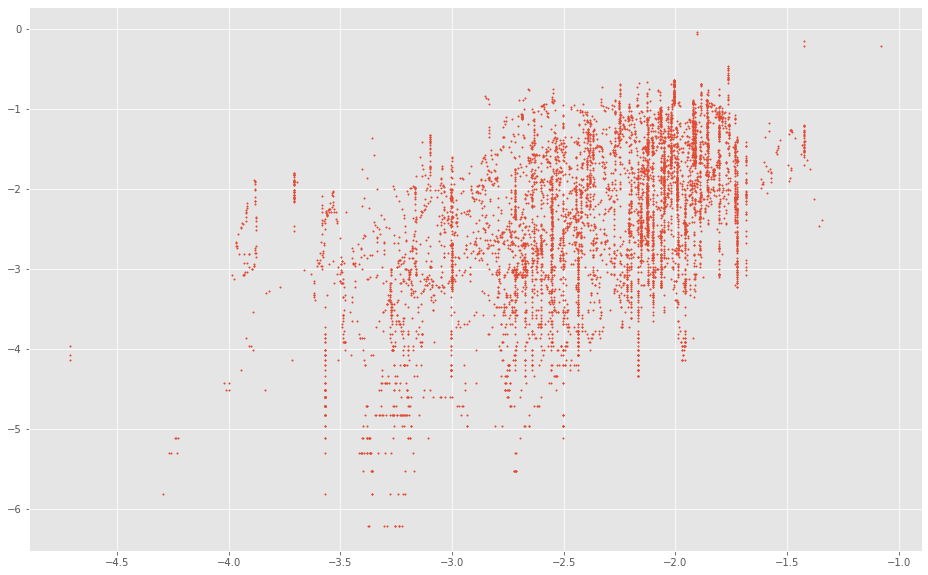

In [58]:
plt.figure(figsize=(16,10))
plt.scatter(test_pred_new, y_test_new, s=2)

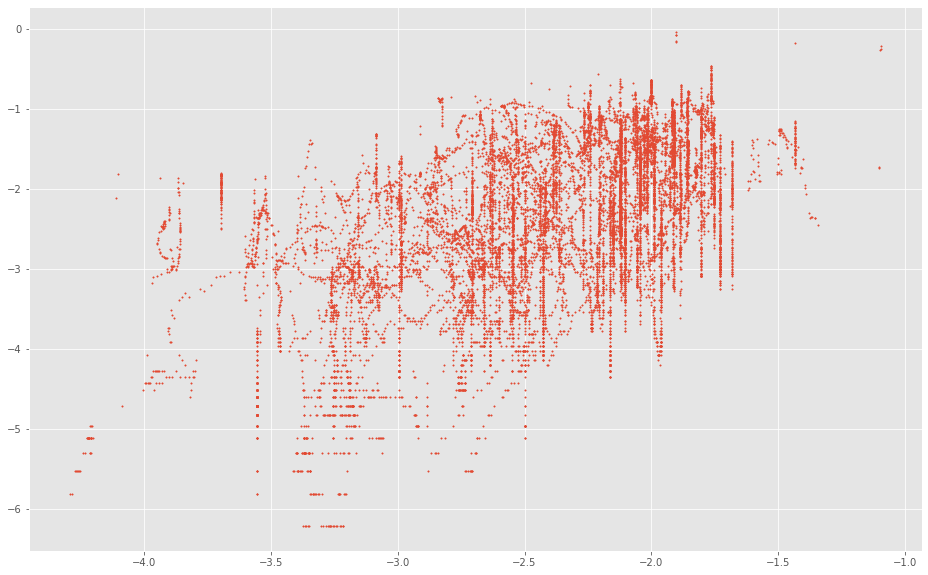

In [59]:
plt.figure(figsize=(16,10))
plt.scatter(train_pred_new, y_train_new,s=2)

## Metric Evaluation for the New Model

Calculate new MSE value for the new model.

In [66]:
train_mse = mean_squared_error(train_pred_new, y_train_new)
print('train MSE for new model', train_mse)
test_mse = mean_squared_error(test_pred_new, y_test_new)
print('test MSE for new model', test_mse)

train MSE for new model log_positive_rate    0.693504
dtype: float64
test MSE for new model log_positive_rate    0.709016
dtype: float64


Let us run the old model on the cleaned data used to train the new model, to prove that the reduction in error is caused by the new model fitting the data better.

In [67]:
train_pred_old = predict(df_feature_train_new, beta)
prev_train_mse = mean_squared_error(train_pred_old, y_train_new)
print('train MSE for old model', prev_train_mse)

test_pred_old = predict(df_feature_test_new, beta)
prev_test_mse = mean_squared_error(test_pred_old, y_test_new)
print('test MSE for old model', prev_test_mse)

train MSE for old model log_positive_rate    1.24951
dtype: float64
test MSE for old model log_positive_rate    1.268573
dtype: float64


we can see that the error for predictions on the cleaned data is reduced on the new model compared to the old one. Therefore, the new model is better than the old one.

## Conclusion

The initial model has a MSE value of approximately 1.7 while the final model, after more data cleaning, has a MSE value of approximately 0.7. This indicates the second model is better because it has lower error.